In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [3]:
df = pd.read_excel("Dataset.xlsx")

### Data Exploration
* Look at the first 5 rows of the data set
* Look at the descriptive statistics
* Check for missing and duplicated values
* Visualise trends

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [5]:
df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [6]:
data_duplicates = df.duplicated().sum()
df.duplicated().any()
data_info = df.info()

data_duplicates
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [7]:
df.describe(include = 'all')

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
count,12483.00000,12483,12483.000000,12483,12483,12483,12483,12483,12483,12483,...,12483,12483,12483,12483,12483,12483,12483,12483.000000,12483.000000,12483
unique,NaN,11617,NaN,2,9255,12138,12483,12483,3,12483,...,12467,6173,6248,12483,90,12483,12479,NaN,NaN,12482
top,NaN,Michael Johnson,NaN,Male,Lake Michael,wsmith@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment C,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2020-03-26'}]","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 85, 'TimeSpent(minutes)': 3}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 1, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2022-12-26', 'Email_Opened': ...",NaN,NaN,2020-10-21 06:44:42
freq,NaN,6,NaN,6269,17,5,1,1,4199,1,...,2,42,9,1,167,1,2,NaN,NaN,2
mean,7242.00000,NaN,43.930065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.973884,0.505808,NaN
std,3603.67604,NaN,15.341521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.644623,0.499986,NaN
min,1001.00000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,4121.50000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,7242.00000,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN
75%,10362.50000,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN


In [8]:
df.describe() #for only numerical variables

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Check how churnLabel variable and other variables are related

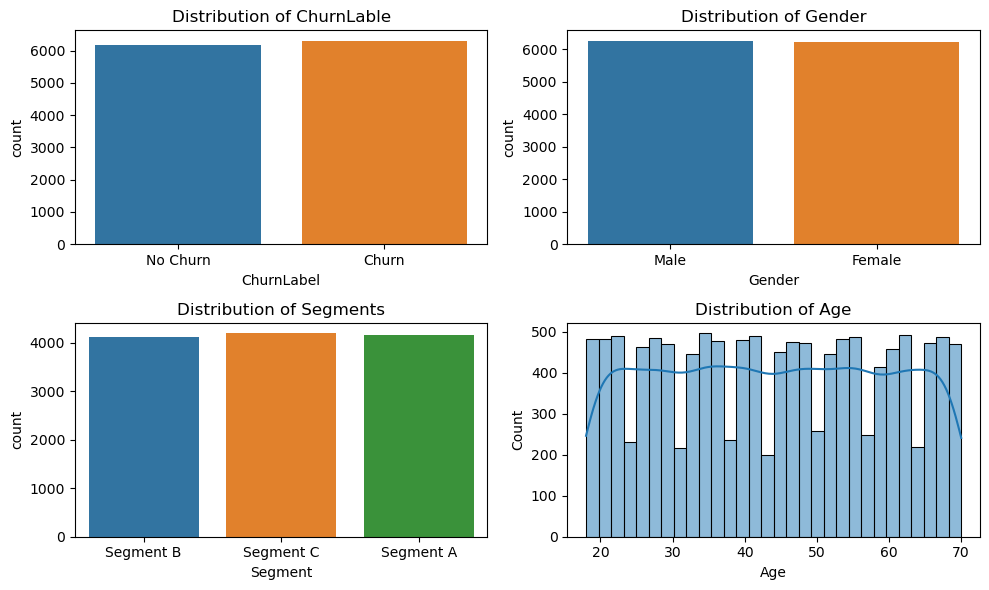

In [10]:
#setup figure and its axis
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
#plot distribution of target variable churnlabel
sns.countplot(x = 'ChurnLabel', data = df, ax = ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLable')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

#plot distribution of the genders
sns.countplot(x = 'Gender', data = df, ax = ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

#plot distibution of the segments
sns.countplot(x = 'Segment', data = df, ax = ax[1, 0])
ax[1, 0].set_title('Distribution of Segments')

#plot distribution of Age
sns.histplot(df['Age'], bins = 30, ax = ax[1, 1], kde = True)
ax[1, 1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

### Interpretation box plot

1. Distribution of ChurnLabel (Top-left):
 * The number of customers who churned is nearly equal to those who did not churn.
 * This indicates a balanced dataset regarding churn, which is useful for building predictive models.
2. Distribution of Gender (Top-right):
 * The gender distribution is also fairly balanced between male and female customers.
 * This balance helps avoid gender bias in customer analysis.
3. Distribution of Segments (Bottom-left):
 * Customers are evenly distributed across the three segments (Segment A, B, and C).
 * Suggests no single segment dominates the customer base.
4. Distribution of Age (Bottom-right):
 * The age distribution appears roughly uniform, with customers spread fairly evenly across the age range (approximately 18 to 70).
 * The smooth line (likely a KDE plot) indicates a steady age distribution without sharp peaks.

### Correlation Analysis
Which of the other variables correlates more with the ChurnLabel variable

In [11]:
#Correlation with ChurnLabel
df.select_dtypes(include = np.number).corr()

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


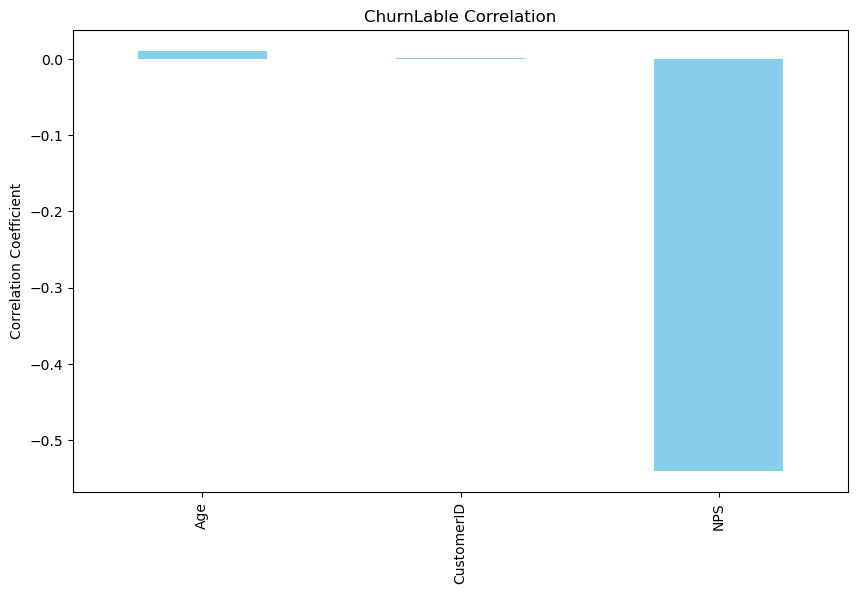

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [12]:
#plot the correlation
correlation = df.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending = False)

plt.figure(figsize = (10, 6))
correlation.drop('ChurnLabel').plot(kind = 'bar', color = 'skyblue')
plt.title('ChurnLable Correlation')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

Clearly we can see that NPS i negatively correlated while for Age is it positively correlated but ver weak

### Exploring nested variables
We will be exploring all nested columns or variables in the data set

In [13]:
# List out all nested variables
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Print out the first value in each of the nested variables
w1, w2 = 25, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Temporal Analysis
We look at how the churn rates changes over time and to also see if there are any recuring patterns. 

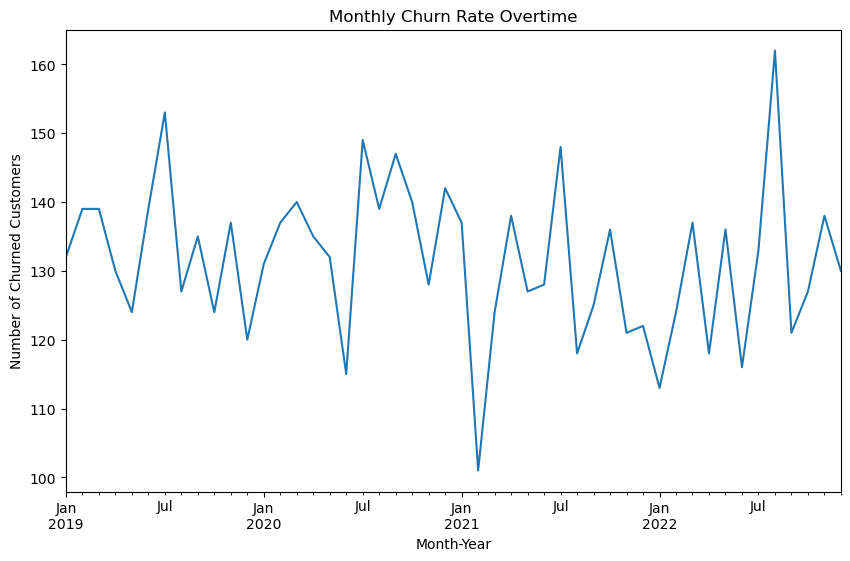

In [14]:
# Convert Timestamp to Datetime format so that it can be grouped properly
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the Timestamp variable
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#Group by MonthYear and Calculate the Churn Rate
Monthly_Churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

#plot churn rate overtime 
plt.figure(figsize = (10, 6))
Monthly_Churn_rate.plot()
plt.title('Monthly Churn Rate Overtime')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

### Interpretation of the graph
* The number of churned customers fluctuates significantly month-to-month, with no consistent long-term upward or downward trend.
* Notable peaks appear around mid-2019, early 2021, and late 2022 — these may indicate external factors or service issues that triggered higher churn.
* There are visible dips (e.g., early 2021), suggesting months where retention efforts may have been more effective or customer satisfaction was high.

### Visuals
We look at how Feed back ratings from customers affects Churn rates

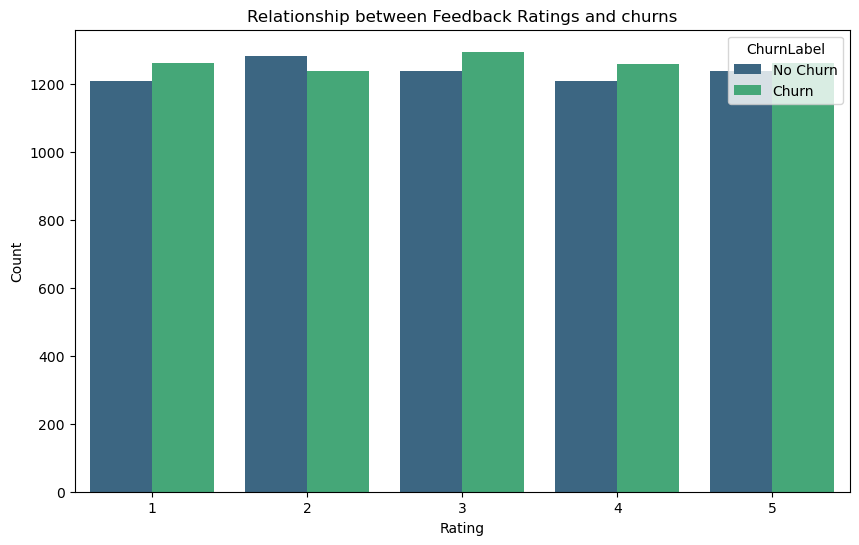

In [15]:
# Extracting rating from the feedback variable
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plotting Relationship between Feedback Ratings and churns
plt.figure(figsize = (10, 6))
sns.countplot(x = 'FeedbackRating', data = df, hue = 'ChurnLabel', palette = 'viridis')
plt.title('Relationship between Feedback Ratings and churns')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'ChurnLabel', loc = 'upper right', labels = ['No Churn', 'Churn'])
plt.show()

### Graph Interpretation
* Surprisingly, churn occurs across all ratings, even at high ratings like 5.
* There isn’t a strong or clear trend of lower ratings leading to more churn, which you might expect.
* In fact, churn is quite balanced across ratings, suggesting:
     * Feedback rating alone is not a strong predictor of churn.
     * Customers may leave even if they give good ratings—possibly due to price, better competitors, or non-feedback-related reasons.

### Data Preprocessing and feature Engineering
Here we will;
1. Create new features that may have predictive powers.
2. Convert categorical variables to numerical variables using encoding technique.
3. Scale or normalize numerical variables if necessary.
4. split data into training and test subset.
5. Remove irrellevant features.

We beging by converting nested values from string functions to list/dictionary using literal_eveal functions.

In [16]:
# List nested columns or variables
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Apply the literal_function
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More Features will be extracted from the data

In [17]:
# PurchaseHistory
df['PurchaseProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

# SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])                                                               
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

#WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

#EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

#Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

#MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
        - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

### Special Extraction
We will be extracting from three variables.
- ServiceInteractions
- PaymentHistory
- ClickstreamData

Check for the unique parameters

In [18]:
# get all unique ServiceInteractions 'Types'
Service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set(i['Type'] for i in x)))
Service_interaction_types = Service_interaction_types.to_list()
Unique_service_interation_type = []
for i in Service_interaction_types:
    Unique_service_interation_type.extend(i)
Unique_service_interation_type = list(set(Unique_service_interation_type))
print('All unique Service interaction types:', Unique_service_interation_type)

#Get all unique method for PaymentHistory
Payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set(i['Method'] for i in x)))
Payment_history_methods = Payment_history_methods.to_list()
Unique_payment_history_methods = []
for i in Payment_history_methods:
    Unique_payment_history_methods.extend(i)
    Unique_payment_history_methods = list(set(Unique_payment_history_methods))
print('All unique payment history methods', Unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'
Clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set(i['Action'] for i in x)))
Clickstream_data_actions = Clickstream_data_actions.to_list()
Unique_clickstream_data_actions = []
for i in Clickstream_data_actions:
    Unique_clickstream_data_actions.extend(i)
    Unique_clickstream_data_actions = list(set(Unique_clickstream_data_actions))
print('All unique clickstream data actions', Unique_clickstream_data_actions)
    

All unique Service interaction types: ['Email', 'Chat', 'Call']
All unique payment history methods ['PayPal', 'Credit Card', 'Bank Transfer']
All unique clickstream data actions ['Add to Cart', 'Search', 'Click']


From these three columns, we will be encoding more

In [19]:
#ServiceInteractions
for usit in Unique_service_interation_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))
    
# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

#ClickstreamData
for ucda in Unique_clickstream_data_actions:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

Next we see a subset of the new data 

In [20]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,2,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,10,4,5,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,18,24,17,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,5,1,4,2,0.666667,17,4,9


See all the columns we currently have

In [21]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_Add

We filter the required columns or variable 

In [22]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    'SubscriptionDuration'
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,EngagementMetricsLogins,EngagementMetricsFrequency,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,19,Weekly,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,Weekly,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,19,Monthly,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,4,Daily,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,12,Weekly,...,96.0,193.0,4,5,1,2,9,17,4,580


In [23]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamData_Search                      12
SubscriptionD

Check for number of unique values

In [24]:
print('Total dataset length:', len(df_))
df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Since the unique values are not much, we go ahead and encode them

In [25]:
#Gender encoding
gender_map = {'Male': 0, 'Female': 1}

#SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

#EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encoding
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [26]:
df_.loc[0]

Age                                      31.00
Gender                                    0.00
NPS                                       3.00
ChurnLabel                                1.00
PurchaseFrequency                        38.00
PurchaseValue                          3994.72
SubscriptionPlan                          0.00
WebsitePageViews                         49.00
EngagementMetricsLogins                  19.00
EngagementMetricsFrequency                0.00
FeedbackRating                            1.00
MarketingCommunicationNoOfEmails          8.00
MarketingCommunicationOpenClickDiff     319.00
MarketingCommunicationSentOpenDiff      818.00
ServiceInteractions_Call                  1.00
ServiceInteractions_Email                 1.00
ServiceInteractions_Chat                  2.00
PaymentHistoryNoOfLatePayments           40.00
ClickstreamData_Click                     4.00
ClickstreamData_Add to Cart               8.00
ClickstreamData_Search                   12.00
SubscriptionD

### correlation matrix plot

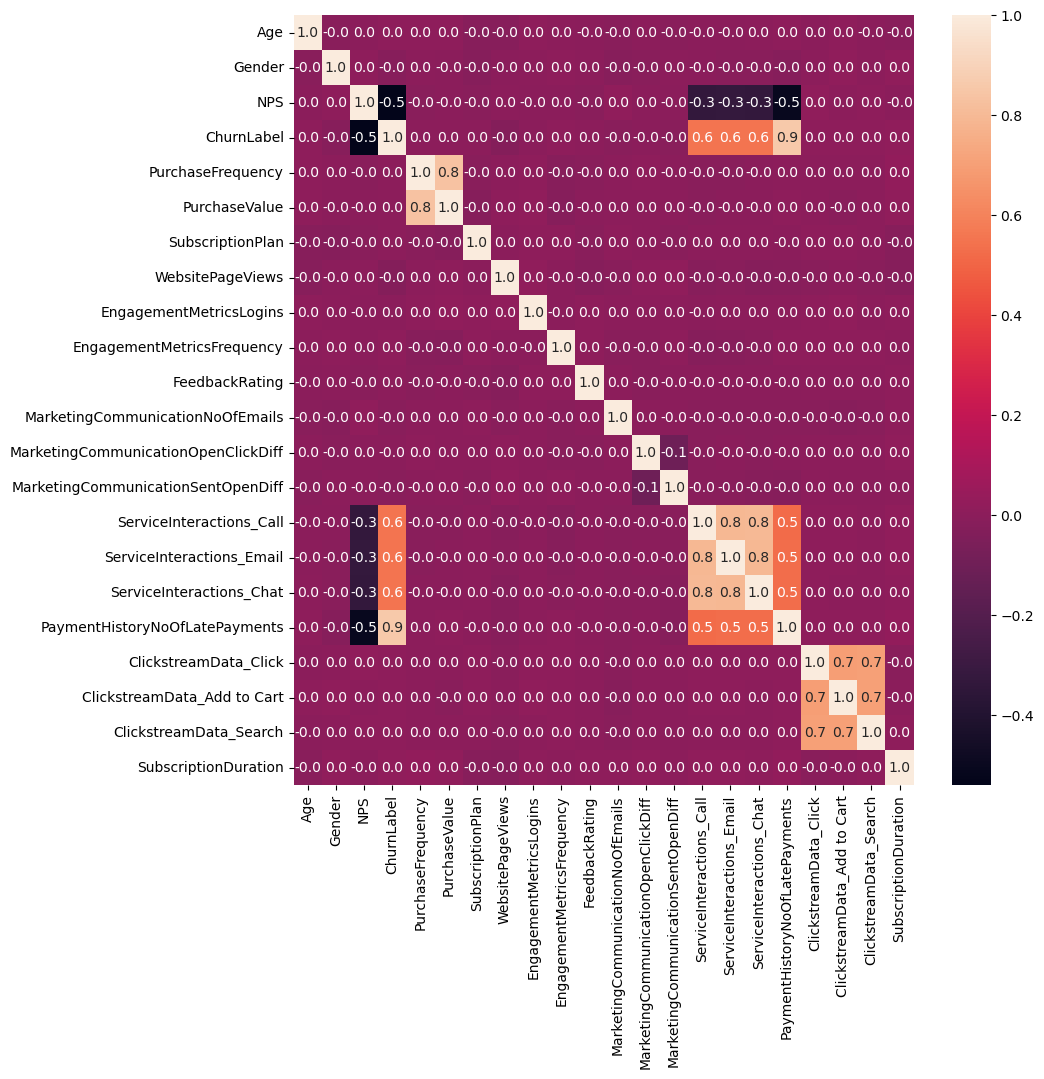

In [31]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_corr, annot = True, fmt = '.1f', ax = ax)
plt.show()

### Split Data into Test Train and Validation

In [113]:
x = df_.drop(columns = ['ChurnLabel'])
y = df_['ChurnLabel']

x_train, x_other, y_train, y_other = train_test_split(x, y, train_size = 0.8, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other, test_size = 0.3, random_state = 42)

### Reduce the data using standard scaling

In [115]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.fit_transform(x_test)

### Data Modeling
We will be deploying two different models;
1. Logistic Regression
2. DecisionTree Classifier 

Metrics we will be using for our model are;
-  Accuracy
-  Precision Score
-  Recall Score
-  F1 Score

In [124]:
# define an evaluation function
def evaluate (x, y, model, subset = ''):
    y_pred = model.predict(x)
    
    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')
          


### Modelling with Logistic Regression

In [125]:
#Build Our Model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Evaluate the model on train and validation subset
evaluate(x_train, y_train, lr, 'Train')
evaluate(x_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9686561185659924
Train Precision Score: 0.9614097263240795
Train Recall Score: 0.9766
Train F1 Score: 0.9689453318781626
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


The Logistic Regression model performs consistently well on both training and validation sets, showing high accuracy and balanced precision-recall, with no signs of overfitting. It's a reliable model for churn prediction.

### Modelling with Decision Tree

In [129]:
#Build our Model
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

# Evaluate the model on train and validation subset
evaluate(x_train, y_train, dt, 'Train')
evaluate(x_val, y_val, dt, 'Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335303
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


The Decision Tree model performs very well but shows slightly higher scores on training than validation, indicating minor overfitting. Still, it maintains strong generalization and is effective for churn prediction.

### Modelling with Random Forest

In [128]:
RandomForestClassifier
#Build our Model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Evaluate the model on train and validation subset
evaluate(x_train, y_train, rf, 'Train')
evaluate(x_val, y_val, rf, 'Validation')

Train Accuracy Score: 0.9997997196074504
Train Precision Score: 0.9998031108485922
Train Recall Score: 0.9998031108485922
Train F1 Score: 0.9998031108485922
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


This model shows extremely high training performance, suggesting overfitting, as the validation scores are notably lower. While validation results are still strong, the model may not generalize well to unseen data.

### Evaluation on the test set

In [130]:
evaluate(x_test, y_test, lr, 'LogisticRegression Test')
evaluate(x_test, y_test, dt, 'DecisionTreeClassifier Test')
evaluate(x_test, y_test, rf, 'RandomForestClassifier Test')

LogisticRegression Test Accuracy Score: 0.9685174585002863
LogisticRegression Test Precision Score: 0.963302752293578
LogisticRegression Test Recall Score: 0.9733487833140209
LogisticRegression Test F1 Score: 0.968299711815562
DecisionTreeClassifier Test Accuracy Score: 0.9730967372638809
DecisionTreeClassifier Test Precision Score: 0.9736238532110092
DecisionTreeClassifier Test Recall Score: 0.9725085910652921
DecisionTreeClassifier Test F1 Score: 0.9730659025787965
RandomForestClassifier Test Accuracy Score: 0.9736691471093303
RandomForestClassifier Test Precision Score: 0.9736238532110092
RandomForestClassifier Test Recall Score: 0.9736238532110092
RandomForestClassifier Test F1 Score: 0.9736238532110092


### Create a confusion matris

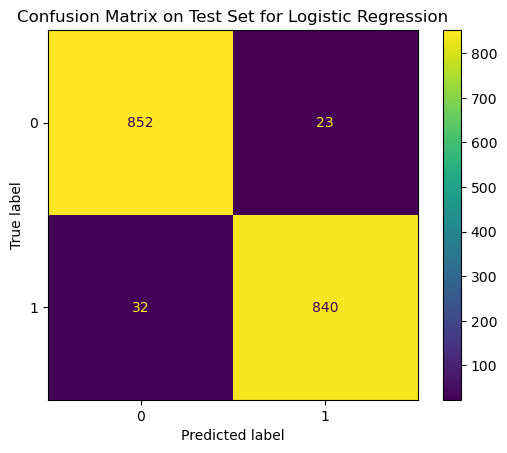

In [133]:
lr_y_pred = lr.predict(x_test)
LogisticRegression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = LogisticRegression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

0 = No Churn, 1 = Churn

Predicted No Churn (0)	Predicted Churn (1)
Actual No Churn (0)	852 (True Negative)	23 (False Positive)
Actual Churn (1)	32 (False Negative)	840 (True Positive)

This Logistic Regression model performs very well, with excellent balance in detecting both churn and no-churn cases, making it reliable for churn prediction tasks.

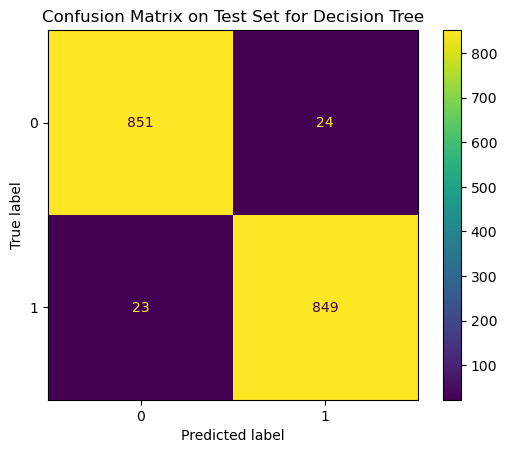

In [134]:
dt_y_pred = dt.predict(x_test)
DecisionTree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = DecisionTree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

### Interpretation
The Decision Tree classifier shows excellent performance on both training and validation sets. The training scores are slightly higher, indicating a slight overfitting, but the validation metrics are still very strong and consistent. Overall, the model generalizes well and is highly effective for churn prediction.

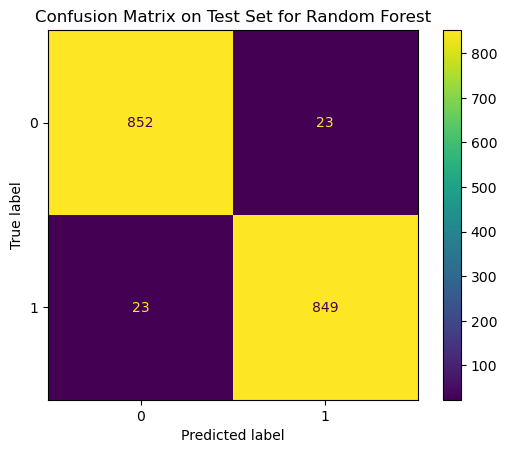

In [135]:
rf_y_pred = rf.predict(x_test)
RandomForest_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = RandomForest_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Random Forest')
plt.show()